# Final Project Group 7

# Authors: Leroy Musa, Chan Woo Hwang, Gordon Hamilton, Joaquin Philco

**Original Dataset Source: House Prices 2023 Dataset. gigasheet. https://www.gigasheet.com/sample-data/house-prices-2023-dataset**


**Modified Dataset: Student Performance https://raw.githubusercontent.com/leroymusa/EECS3401-Final-Project/main/house_prices.csv**


# 1. Looking at the Big Picture

1. The data is supervised, since it is labelled.
2. The task is a Regression, to predict the house price of homes in Pakistan.
3. We are using Batch learning since we are only given one data source that is not being updated.

This prediction can be useful for relators or prospective home buyers to get a better understanding of what a reasonable price for a home in Pakistan would be.

# 2. Acquiring Dataset

In [1]:
# Import libraries
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# Avoiding deprecated warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

# Download the dataset
url = "https://raw.githubusercontent.com/leroymusa/EECS3401-Final-Project/main/house_prices.csv"
housing_prices = pd.read_csv(url, sep=',')

# Let's create a backup copy of the dataset
housing_backup = housing_prices

In [2]:
housing_prices.head() 

,Unnamed: 0,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla
0,0,Flat,10000000,G-10,Islamabad,2,For Sale,2,4.0
1,1,Flat,6900000,E-11,Islamabad,3,For Sale,3,5.6
2,2,House,16500000,G-15,Islamabad,6,For Sale,5,8.0
3,3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,40.0
4,4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,8.0


In [3]:

housing_prices.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99499 entries, 0 to 99498
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     99499 non-null  int64  
 1   property_type  99499 non-null  object 
 2   price          99499 non-null  int64  
 3   location       99499 non-null  object 
 4   city           99499 non-null  object 
 5   baths          99499 non-null  int64  
 6   purpose        99499 non-null  object 
 7   bedrooms       99499 non-null  int64  
 8   Area_in_Marla  99499 non-null  float64
dtypes: float64(1), int64(4), object(4)
memory usage: 6.8+ MB


In [4]:
housing_prices.describe()

,Unnamed: 0,price,baths,bedrooms,Area_in_Marla
count,99499.000000,9.949900e+04,99499.000000,99499.000000,99499.000000
mean,78883.893064,1.037592e+07,3.530106,3.350737,8.757479
std,48239.423663,1.066000e+07,1.474217,1.255913,7.466471
min,0.000000,1.550000e+04,1.000000,0.000000,0.000000
25%,37236.500000,1.500000e+05,2.000000,2.000000,4.800000
50%,76065.000000,7.500000e+06,3.000000,3.000000,6.700000
75%,119401.500000,1.550000e+07,5.000000,4.000000,10.000000
max,168445.000000,4.490000e+07,7.000000,6.000000,194.000000


# 3. Exploratory Data Analysis of the Dataset

## 3.1 EDAs for Non-Vumerical Variables

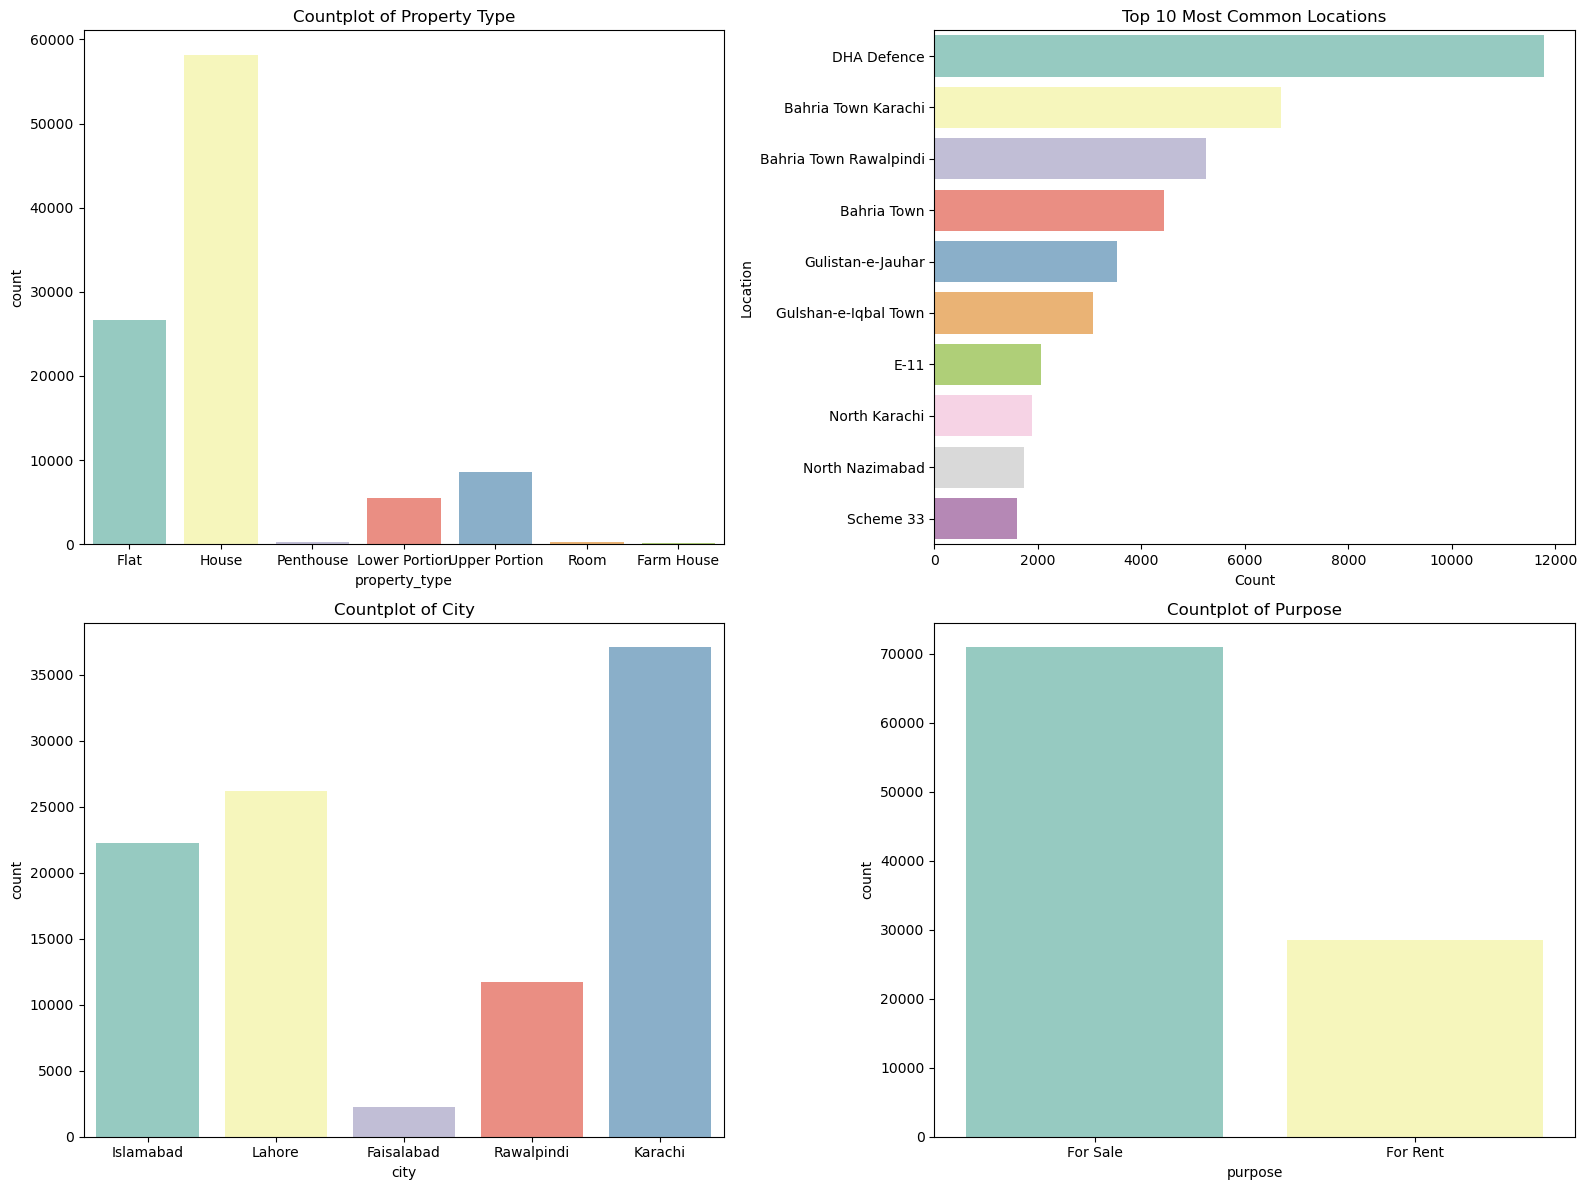

In [5]:
# Set up the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Property Type Count Plot
sns.countplot(x='property_type', data=housing_prices, palette='Set3', ax=axes[0, 0])
axes[0, 0].set_title('Countplot of Property Type')

# Location Count Plot
location_counts = housing_prices['location'].value_counts().head(10)
sns.barplot(x=location_counts.values, y=location_counts.index, palette='Set3', ax=axes[0, 1])
axes[0, 1].set_title('Top 10 Most Common Locations')
axes[0, 1].set_xlabel('Count')
axes[0, 1].set_ylabel('Location')

# City Count Plot
sns.countplot(x='city', data=housing_prices, palette='Set3', ax=axes[1, 0])
axes[1, 0].set_title('Countplot of City')

# Purpose Count Plot
sns.countplot(x='purpose', data=housing_prices, palette='Set3', ax=axes[1, 1])
axes[1, 1].set_title('Countplot of Purpose')

plt.tight_layout()
plt.show()

## 3.2 EDAs for Numerical Variables

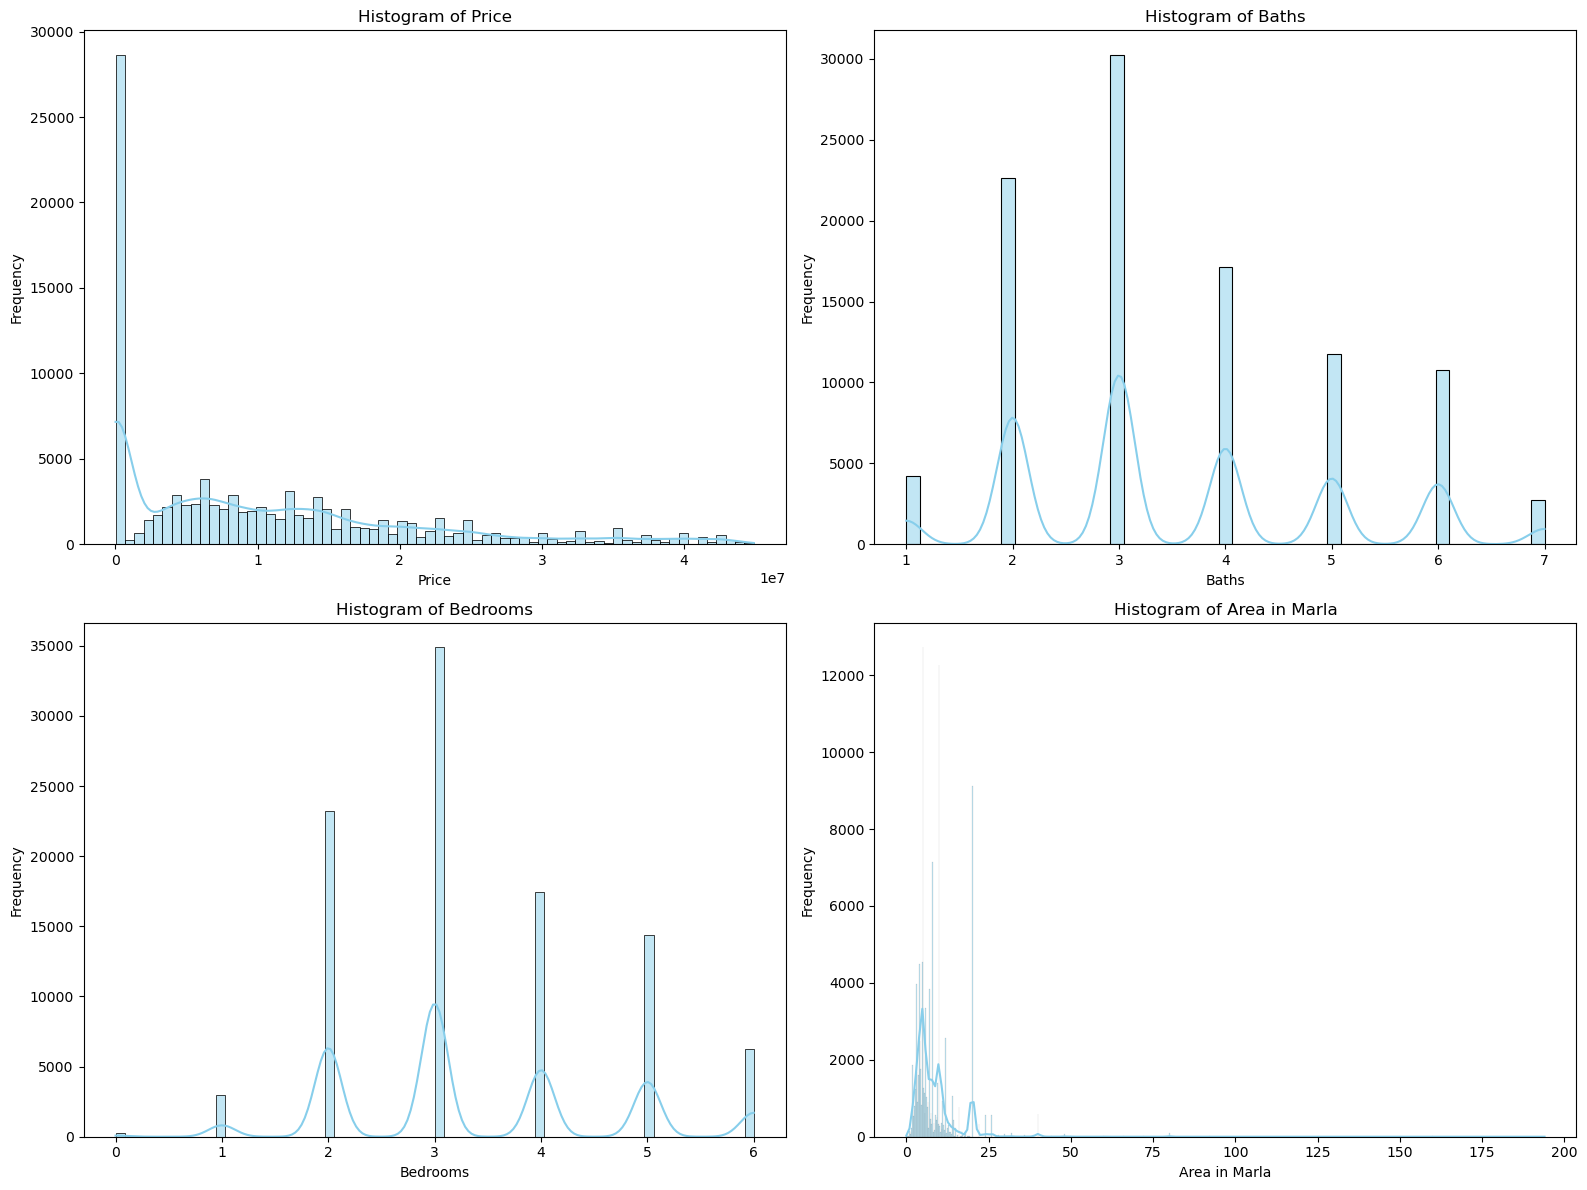

<Figure size 3000x2000 with 0 Axes>

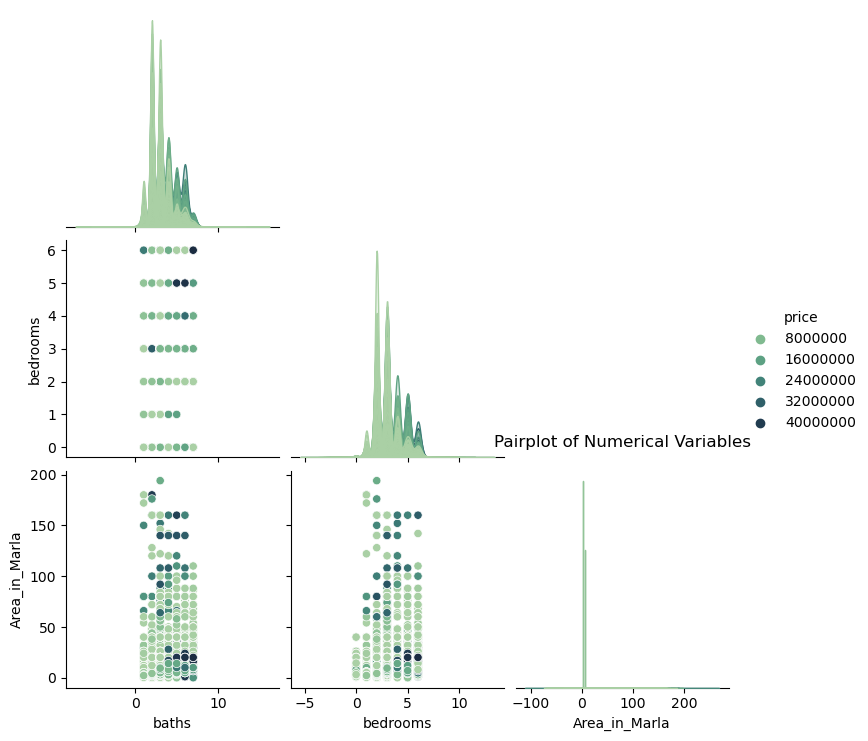

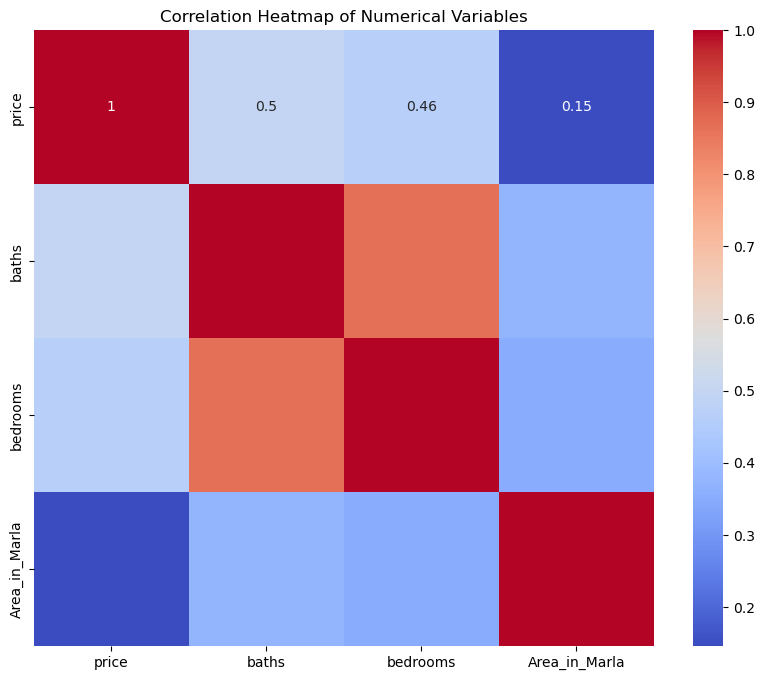

In [6]:
# Set up the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Histogram of Price
sns.histplot(data=housing_prices, x='price', kde=True, color='skyblue', ax=axes[0, 0])
axes[0, 0].set_title('Histogram of Price')
axes[0, 0].set_xlabel('Price')
axes[0, 0].set_ylabel('Frequency')

# Histogram of Baths
sns.histplot(data=housing_prices, x='baths', kde=True, color='skyblue', ax=axes[0, 1])
axes[0, 1].set_title('Histogram of Baths')
axes[0, 1].set_xlabel('Baths')
axes[0, 1].set_ylabel('Frequency')

# Histogram of Bedrooms
sns.histplot(data=housing_prices, x='bedrooms', kde=True, color='skyblue', ax=axes[1, 0])
axes[1, 0].set_title('Histogram of Bedrooms')
axes[1, 0].set_xlabel('Bedrooms')
axes[1, 0].set_ylabel('Frequency')

# Histogram of Area in Marla
sns.histplot(data=housing_prices, x='Area_in_Marla', kde=True, color='skyblue', ax=axes[1, 1])
axes[1, 1].set_title('Histogram of Area in Marla')
axes[1, 1].set_xlabel('Area in Marla')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Pairplot
plt.figure(figsize=(30, 20))
sns.pairplot(data=housing_prices[['price', 'baths', 'bedrooms', 'Area_in_Marla']], hue="price", corner=True, dropna=True, palette="ch:r=-.5,l=.75")
plt.title('Pairplot of Numerical Variables')
plt.show()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(housing_prices[['price', 'baths', 'bedrooms', 'Area_in_Marla']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()


In [7]:
corr_matrix = housing_prices.corr(numeric_only=True)
corr_matrix

,Unnamed: 0,price,baths,bedrooms,Area_in_Marla
Unnamed: 0,1.000000,-0.007957,0.001672,-0.015748,0.061182
price,-0.007957,1.000000,0.496222,0.464393,0.145644
baths,0.001672,0.496222,1.000000,0.863885,0.373993
bedrooms,-0.015748,0.464393,0.863885,1.000000,0.352021
Area_in_Marla,0.061182,0.145644,0.373993,0.352021,1.000000


In [8]:
corr_matrix["price"].sort_values(ascending=False)

price            1.000000
baths            0.496222
bedrooms         0.464393
Area_in_Marla    0.145644
Unnamed: 0      -0.007957
Name: price, dtype: float64

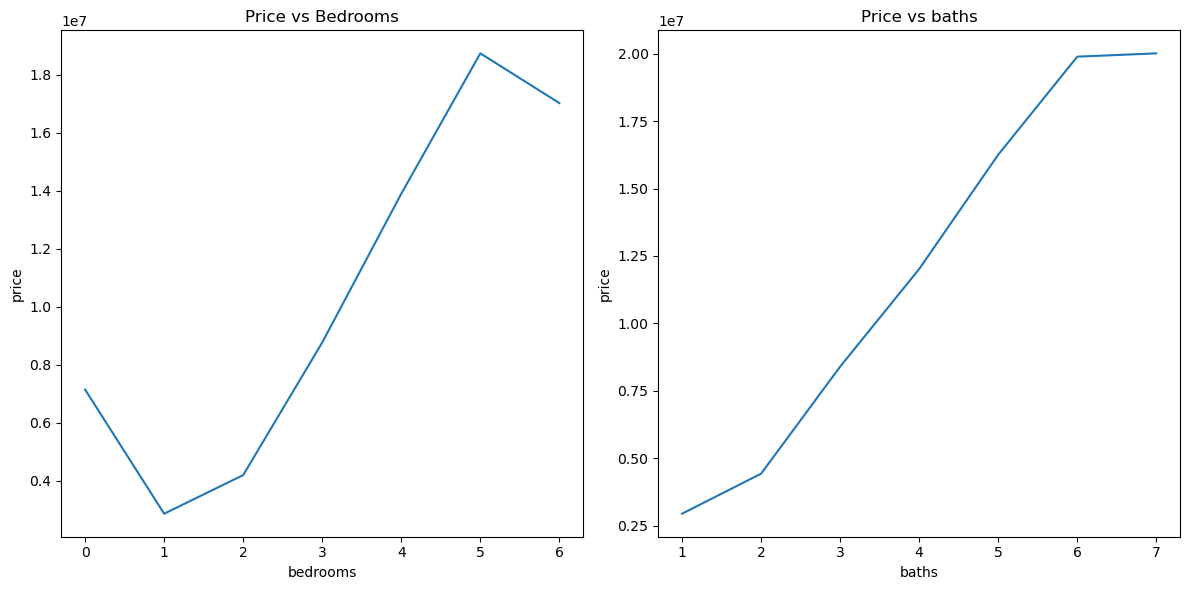

In [9]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

#plot bedrooms vs. price
sns.lineplot(x="bedrooms", y="price", data=housing_prices, errorbar=None, ax=axs[0])
axs[0].set_title('Price vs Bedrooms')

# Plot the second graph
sns.lineplot(x="baths", y="price", data=housing_prices, errorbar=None,ax=axs[1])
axs[1].set_title('Price vs baths')

# Show the plots
plt.tight_layout()
plt.show()

# 4. Preparing the Dataset for Machine Learning Models

## 4.1 Removing Unnecessary Columns

In [10]:
# Removing unnecessary Headers
housing_prices = housing_prices.drop('Unnamed: 0', axis=1) # Unnecessary
housing_prices = housing_prices.drop('location', axis=1) # Columns has too many different categorical tags

## 4.2 Remove Duplicate Rows


In [11]:
# Check for duplicate rows and delete them
housing_prices.duplicated().sum()

# Remove duplicated
housing_prices .drop_duplicates(inplace=True)

## 4.3 Handle Missing Values

In [12]:
# Find the number of missing values in each column
housing_prices.isna().sum()


property_type    0
price            0
city             0
baths            0
purpose          0
bedrooms         0
Area_in_Marla    0
dtype: int64

## 4.4 Checking for Unnatural Zero Values

In [13]:
columns_to_check = ['price', 'baths', 'bedrooms', 'Area_in_Marla']

def count_zeros(column_name, dataframe):
    return (dataframe[column_name] == 0).sum()

for column in columns_to_check:
    print("Number of zeros in the", column, "column:", count_zeros(column, housing_prices))


Number of zeros in the price column: 0
Number of zeros in the baths column: 0
Number of zeros in the bedrooms column: 281
Number of zeros in the Area_in_Marla column: 10


## 4.5 Dropping Bedroom Rows
Bedrooms have a substantial amount of zeros for a variable that can not take zero as an answer. (There is no house with zero rooms.). Therefore, we will drop the rows that the zeros in them.

In [14]:
# Remove rows with zero bedrooms
housing_prices = housing_prices[housing_prices['bedrooms'] != 0]

# Check Updated data frame
print("Number of zeros in the bedroom column:", (housing_prices["bedrooms"] == 0).sum())

Number of zeros in the bedroom column: 0


## 4.6 Preprocessing Pipeline
1. Fill in the missing numerical values with the mean using a SimpleImputer
2. Scale the numerical columns using StandardScaler. Do not scale the target
3. Encode the categorical columns using OneHotEncoder

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [16]:
# Assuming numerical_columns and categorical_columns are lists of column names
numerical_columns = housing_prices.select_dtypes(include='number').columns.to_list()
categorical_columns = housing_prices.select_dtypes(exclude='number').columns.to_list()

#exclude the target from numerical columns
numerical_columns.remove("price")


# Create preprocessing pipeline for numerical columns
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Create preprocessing pipeline for categorical columns
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing pipelines for numerical and categorical columns
preprocessing_pipeline = ColumnTransformer([
    ('numerical', numerical_pipeline, numerical_columns),
    ('categorical', categorical_pipeline, categorical_columns)],
    remainder='passthrough')

# Display the preprocessing pipeline
preprocessing_pipeline

ColumnTransformer(remainder='passthrough',
                  transformers=[('numerical',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['baths', 'bedrooms', 'Area_in_Marla']),
                                ('categorical',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['property_type', 'city', 'purpose'])])

In [17]:
# # Apply the preprocessing pipeline on the dataset
housing_prepared = preprocessing_pipeline.fit_transform(housing_prices)

# Scikit-learn strips the column headers in most cases, so just add them back on afterward.
feature_names=preprocessing_pipeline.get_feature_names_out()
housing_prepared = pd.DataFrame(data=housing_prepared, columns=feature_names)

housing_prepared


,numerical__baths,numerical__bedrooms,numerical__Area_in_Marla,categorical__property_type_Farm House,categorical__property_type_Flat,categorical__property_type_House,categorical__property_type_Lower Portion,categorical__property_type_Penthouse,categorical__property_type_Room,categorical__property_type_Upper Portion,categorical__city_Faisalabad,categorical__city_Islamabad,categorical__city_Karachi,categorical__city_Lahore,categorical__city_Rawalpindi,categorical__purpose_For Rent,categorical__purpose_For Sale,remainder__price
0,-0.941889,-1.019921,-0.553385,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,10000000.0
1,-0.283900,-0.264798,-0.376879,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,6900000.0
2,1.690069,1.245447,-0.112120,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,16500000.0
3,0.374090,0.490325,3.418004,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,43500000.0
4,-0.283900,-0.264798,-0.112120,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,7000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42893,-0.941889,-1.019921,-0.619575,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,12400000.0
42894,2.348058,1.245447,0.108513,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,17700000.0
42895,1.690069,1.245447,1.652942,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,40000000.0
42896,-0.941889,-1.019921,0.329146,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,25000.0


# 5. Model Selection and Training

## 5.1 Split the dataset into a training dataset (80%) and testing dataset.

In [18]:
from sklearn.model_selection import train_test_split

X = housing_prepared.drop(["remainder__price"], axis=1)
y = housing_prepared["remainder__price"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(34318, 17) (34318,) (8580, 17) (8580,)


## 5.2 Linear Regression

In [19]:
# Model 1
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
# training the model on the training data
lr_model.fit(x_train,y_train)

LinearRegression()

In [20]:
lr_model

LinearRegression()

## 5.3 Decision Tree Regression

In [21]:
# Model 2
from sklearn.tree import DecisionTreeRegressor

# Create and fit the DecisionTreeRegressor
decision_tree_model = DecisionTreeRegressor(random_state=42, max_depth=10, min_samples_split=10)
decision_tree_model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_split=10, random_state=42)

## 5.4 Random Forest Regresion

In [22]:
# Model 3
from sklearn.ensemble import RandomForestRegressor

# Create and fit the RandomForestRegressor model
random_forest_model = RandomForestRegressor(n_estimators=1000, random_state=42, max_depth=10, min_samples_split=10)
random_forest_model.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_split=10, n_estimators=1000,
                      random_state=42)

## 5.4 Gradient Boosting Regressor

In [23]:
# Model 4
from sklearn.ensemble import GradientBoostingRegressor

# Create and fit the RandomForestRegressor model
GBR_model = GradientBoostingRegressor(random_state=42, n_estimators=2000, max_depth = 3, max_features = 3, min_samples_split = 10)
GBR_model.fit(x_train, y_train)

GradientBoostingRegressor(max_features=3, min_samples_split=10,
                          n_estimators=2000, random_state=42)

## 5.5 Model Performances

### 5.5.1 MSE of Models

In [24]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [25]:
def get_mse (model, x, y) : 
    y_pred = model.predict(x)
    return mean_squared_error(y,y_pred)

In [26]:
# Results of all Models
mse_lr_train = get_mse(lr_model, x_train, y_train)
mse_dtr_train = get_mse(decision_tree_model, x_train, y_train)
mse_rfr_train = get_mse(random_forest_model, x_train, y_train)

### 5.5.2 RMSE of Models

In [27]:
def get_rmse(model, x, y) : 
    y_pred = model.predict(x)
    return np.sqrt(get_mse(model, x, y))

In [28]:
# Results of all Models
rmse_lr_train = get_rmse(lr_model, x_train, y_train)
rmse_dtr_train = get_rmse(decision_tree_model, x_train, y_train)
rmse_rfr_train = get_rmse(random_forest_model, x_train, y_train)

### 5.5.3 MAE of Models

In [29]:
def get_mae(model, x, y) : 
    y_pred = model.predict(x)
    return mean_absolute_error(y, y_pred)

In [30]:
# Results of all Models
mae_lr_train = get_mae(lr_model, x_train, y_train)
mae_dtr_train = get_mae(decision_tree_model, x_train, y_train)
mae_rfr_train = get_mae(random_forest_model, x_train, y_train)

### 5.5.4 R2 Score of Models

In [31]:
def get_r2(model, x, y) : 
    y_pred = model.predict(x)
    return r2_score(y,y_pred)

In [32]:
from sklearn.metrics import r2_score
lr_r2_train = get_r2(lr_model, x_train, y_train)
dtr_r2_train = get_r2(decision_tree_model, x_train, y_train)
rfr_r2_train = get_r2(random_forest_model, x_train, y_train)

In [33]:
mse_GBR_train = get_mse(GBR_model, x_train ,y_train) 
mae_GBR_train = get_mae(GBR_model, x_train, y_train)
rmse_GBR_train = get_rmse(GBR_model, x_train, y_train)
GBR_r2_train = r2_score(y_train, GBR_model.predict(x_train))

## 5.6 Performance Visualizition

### 5.6.1 Kaggle Table

In [34]:
kaggle_mse = (51648251239260.234 + 85704513117141.94 + 17850853647378.71)/3
kaggle_mae = (4263643.1500580665 + 6885834.778119646 + 2401756.1026659464)/3
kaggle_rmse = (7186671.777621421 + 9257673.202114122 + 4225027.058774738)/3
kaggle_r2 = (0.8433914644323182 + 0.8464626472335065 +  0.55)/3

### 5.6.2 Training Outputs

In [35]:
col = ["mse", "MAE", "RMSE", "R2"]
ind = ['LinerRegression', "DecisionTreeRegression", "RandomForestRegression", "GradientBoosting"]
con = [[mse_lr_train, mae_lr_train, rmse_lr_train,lr_r2_train], [mse_dtr_train, mae_dtr_train, rmse_dtr_train, dtr_r2_train], [mse_rfr_train, mae_rfr_train, rmse_rfr_train, rfr_r2_train], [mse_GBR_train, mae_GBR_train, rmse_GBR_train, GBR_r2_train]]
pd.DataFrame(con, columns=col, index = ind)

,mse,MAE,RMSE,R2
LinerRegression,5.221321e+13,5.413624e+06,7.225871e+06,0.531196
DecisionTreeRegression,2.360860e+13,2.808225e+06,4.858868e+06,0.788027
RandomForestRegression,2.267310e+13,2.777647e+06,4.761628e+06,0.796426
GradientBoosting,2.483799e+13,3.039217e+06,4.983773e+06,0.776989


In [36]:
columns = ["MSE", "MAE", "RMSE", "R2"]
labels = ["Our Results (RFR)", "Community Average", "RFR on Kaggle"]
rows = [ ["1.279963e+13", mae_rfr_train, rmse_rfr_train, rfr_r2_train], ["3.5886887e+13", "4,246,911.75", "6,850,772","0.583"], ["5173454e+13", kaggle_mae, kaggle_rmse, kaggle_r2] ]
pd.DataFrame(rows, columns=columns, index = labels)

,MSE,MAE,RMSE,R2
Our Results (RFR),1.279963e+13,2777647.415494,4761627.816014,0.796426
Community Average,3.5886887e+13,"4,246,911.75","6,850,772",0.583
RFR on Kaggle,5173454e+13,4517078.010281,6889790.679503,0.746618


### 5.6.3 Testing Outputs

In [37]:
lr_model.fit(x_test,y_test)
decision_tree_model.fit(x_test, y_test)
random_forest_model.fit(x_test, y_test)
GBR_model.fit(x_test, y_test)

GradientBoostingRegressor(max_features=3, min_samples_split=10,
                          n_estimators=2000, random_state=42)

In [38]:
mse_lr_test = get_mse(lr_model, x_test ,y_test) 
mae_lr_test = get_mae(lr_model, x_test, y_test)
rmse_lr_test = get_rmse(lr_model, x_test, y_test)
lr_r2_test = r2_score(y_test, lr_model.predict(x_test))

In [39]:
mse_dtr_test = get_mse(decision_tree_model, x_test, y_test) 
mae_dtr_test = get_mae(decision_tree_model, x_test, y_test)
rmse_dtr_test = get_rmse(decision_tree_model, x_test, y_test)
dtr_r2_test = r2_score(y_test, decision_tree_model.predict(x_test))

In [40]:
mse_rfr_test = get_mse(random_forest_model, x_test, y_test) 
mae_rfr_test = get_mae(random_forest_model, x_test, y_test)
rmse_rfr_test = get_rmse(random_forest_model, x_test, y_test)
rfr_r2_test = r2_score(y_test, random_forest_model.predict(x_test))

In [41]:
mse_GBR_test = get_mse(GBR_model, x_test, y_test) 
mae_GBR_test = get_mae(GBR_model, x_test, y_test)
rmse_GBR_test = get_rmse(GBR_model, x_test, y_test)
GBR_r2_test = r2_score(y_test, GBR_model.predict(x_test))

In [42]:
col = ["mse", "MAE", "RMSE", "R2"]
ind = ['LinerRegression', "DecisionTreeRegression", "RandomForestRegression", "GradientBoosting"]
con = [[mse_lr_test, mae_lr_test, rmse_lr_test,lr_r2_test], [mse_dtr_test, mae_dtr_test, rmse_dtr_test, dtr_r2_test], [mse_rfr_test, mae_rfr_test, rmse_rfr_test, rfr_r2_test], [mse_GBR_test, mae_GBR_test, rmse_GBR_test, GBR_r2_test]]
pd.DataFrame(con, columns=col, index = ind)

,mse,MAE,RMSE,R2
LinerRegression,5.188042e+13,5.416297e+06,7.202806e+06,0.537321
DecisionTreeRegression,2.289575e+13,2.770989e+06,4.784950e+06,0.795811
RandomForestRegression,2.139150e+13,2.707375e+06,4.625095e+06,0.809227
GradientBoosting,2.380058e+13,3.011653e+06,4.878584e+06,0.787742


# 6. Model Visualiztion

## 6.1 Scatter Plots

In [43]:
def plot_scatter(model) : 
    y_pred = model.predict(x_test)
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, y_test, alpha=0.5)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

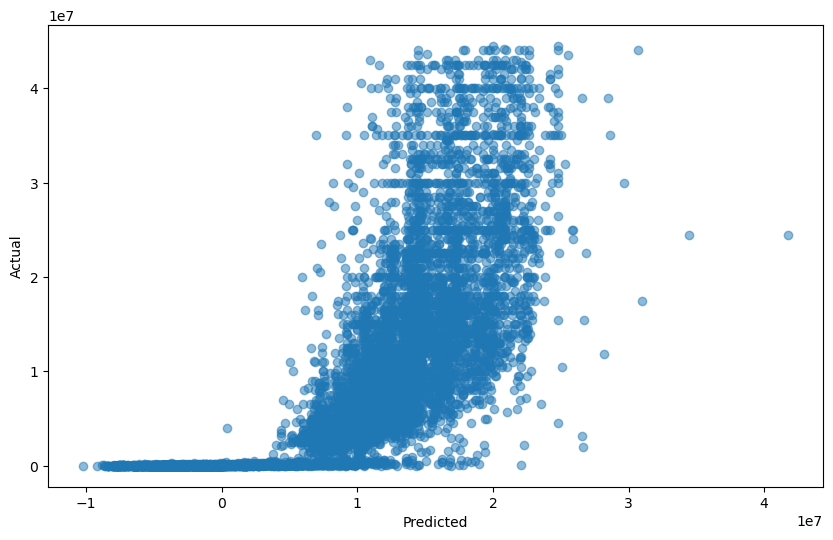

In [44]:
plot_scatter(lr_model)

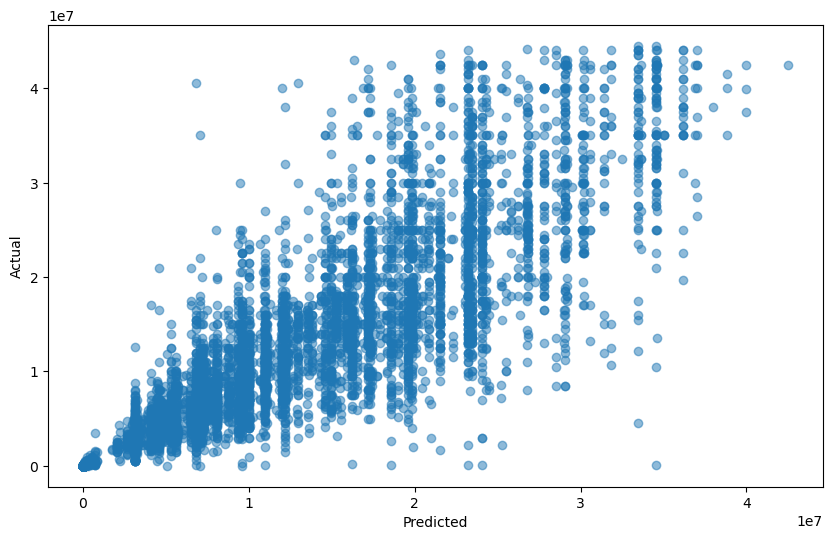

In [45]:
plot_scatter(decision_tree_model)

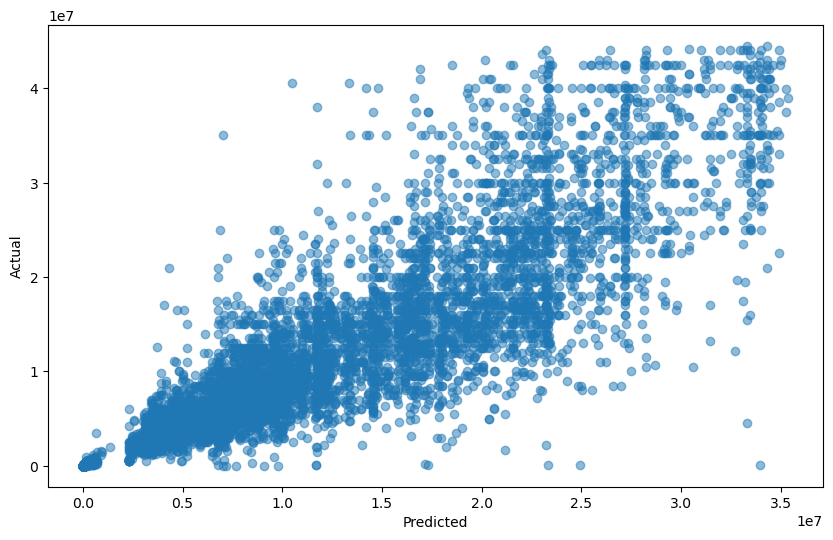

In [46]:
plot_scatter(random_forest_model)

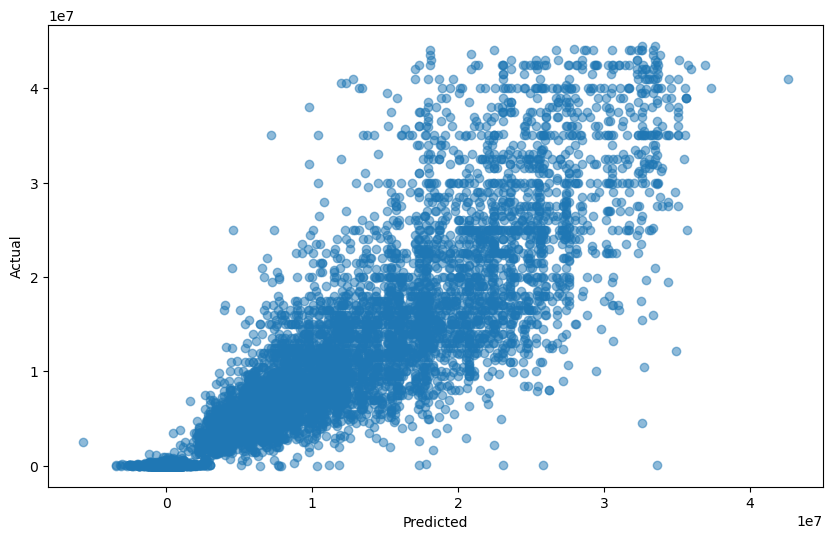

In [47]:
plot_scatter(GBR_model)

##  6.2 Residual Plots

In [48]:
def plot_residual(model) : 
    y_pred = model.predict(x_test)
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, residuals, color='green')
    plt.axhline(y=0, color='red', linestyle='--')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.title('Residual Plot (random)')
    plt.grid(True)
    plt.show()

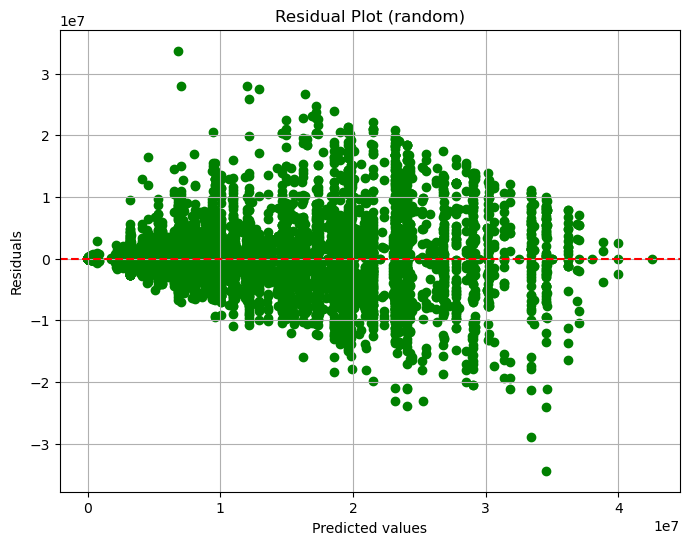

In [49]:
plot_residual(decision_tree_model)

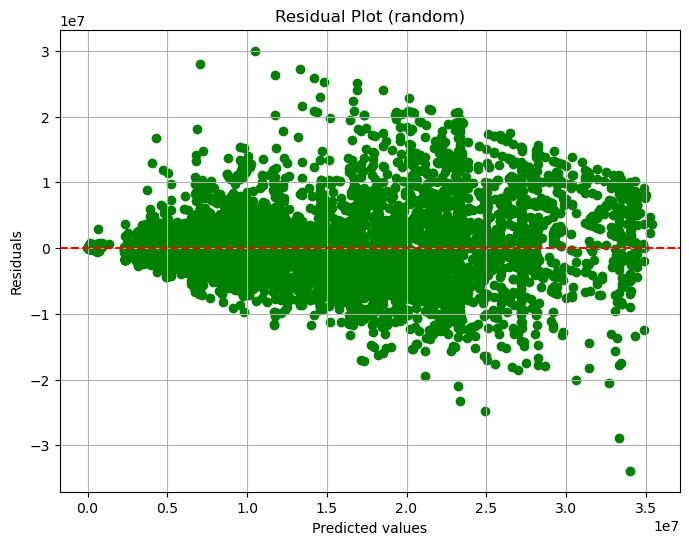

In [50]:
plot_residual(random_forest_model)

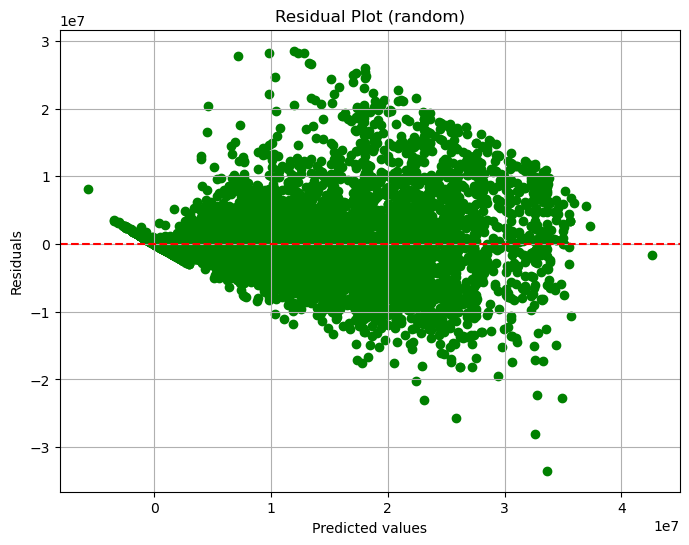

In [51]:
plot_residual(GBR_model)